## Short demonstration of `ehyd_reader`

`ehyd_reader` can read most of the files available at the [ehyd.gv.at](https://ehyd.gv.at/#) platform.
As of now, it can work with groundwater levels (`Grundwasserstand-Monatsmittel-3XXXXX.csv`), precipitation (`N-Tagessummen-1XXXXX.csv`), river stages (`W-Tagesmittel-2XXXXX.csv`) and spring flows (`Quellschüttung-Tagesmittel-3XXXXX.csv`).

These csv time series get turned into a pandas dataframe or a dict (which does contain, among other things, a dataframe with the time series). Further, you can specify to write a *sane* csv file.

In [14]:
import pandas as pd  # Pandas is mandatory
from ehyd_reader import ehyd_reader

For this short demonstration, let us use the well closest to Graz University, the well `329698 	Graz 1, Bl 3401` in the Stadtpark, about 350 meters away from the institute of earth sciences.
To get the data, go to [ehyd.gv.at](https://ehyd.gv.at/#) and paste the HZB number `329698` into the search box at the top of the map. In the popup box on the well marker, select the second link from the bottom, *Grundwasserstand-Monatsmittel* and save the file in this notebooks working directory.

`read_ehyd_csv` needs this file and we need to tell it what kind of output we want.

In [16]:
file = 'Grundwasserstand-Monatsmittel-329698.csv'
output = 'df'  # we want a dataframe. 'dict' would output a dictionary.

park_well = ehyd_reader(file, output)

HZB: 329698
Station got moved during its livetime.
Sation 329698 was moved by 37 meters.


By default, this prints out some information, mainly the HZB number, if the station (or well, in this case) was moved, if so, by how much and some more errors or issues in the data, if applicable.

If we look at the head of `park_well`, we have a bunch of more metadata, extracted from the original csv file:

In [8]:
park_well.head()

datatype,Groundwater
StationName,"Graz 1, Bl 3401"
HZB,329698
HD_num,uw3401
DBMS_num,6002622
CatchmentName,Grazer Feld (Graz/Andritz - Wildon) [MUR]
CatchmentSymbol,MUR
Subcatchment,380 Grazer Feld
RegName,HD-Steiermark
Province,NaN
Operator,Hydrographischer Dienst


Above, we see a lot of information. Let's go through them from top to bottom. `datatype` and `StationName` should be self explanatory.

`HZB`, `HD_num` and `DBMS_num` are the various numbers or identifiers used by the various government agencies. 
For wells contained in ehyd, `HZB` should always exist and serve as a unique, six digits identifier. The others have different styles, depending on the local agency responsible for the wells.

`CatchmentName` is the name of the  general catcment. The `CatchmentSymbol` is a three letter identifier extracted from `CatchmentName`, giving the overaching catchment (the river Mur, in this case). In some csv files, this identifier can be missing. `Subcatchment` gives a three digit number and a name, identifying the local groundwater body the well is situated in.

`RegName` and `Province` give information about the Austrian state/province the well is located in. Depending on the type of data, only one of them might be filled, or the `RegName` will be used for the name of the agency that's running the well.
`Operator` sometimes gives information about who is operating the station (government agency, water power plant, private, etc).

`CatchmentSize` gives the size of the catchment upstream of the gauge for river data. `Lat` and `Lon` give the location. if the well or station was moved, `StationMove` gives the distance it was moved in meters. However, with some, there can be multiple moves. If you are doing analysis that depends on an exact location, you might want to take a closer look at the original files for those.
`elev` and `depth` are the elevation about sea level of the station and the elevation above sea level for the deepest point of the well. `teufe` is the depth of the well below the ground (`teufe = elev - depth`).

`DataError` gives an indication of the type of error that is in the data (if applicable) and `MetaError` gives information about the error in the metadata.

Apart from the large `MultIndex`, `park_well` is just and ordinary pandas dataframe, that we can plot, slize and analyze to our hearts content.

In [9]:
print(type(park_well))
print(park_well.describe())

<class 'pandas.core.frame.DataFrame'>
datatype                                      Groundwater
StationName                             Graz  1, Bl  3401
HZB                                                329698
HD_num                                             uw3401
DBMS_num                                          6002622
CatchmentName   Grazer Feld (Graz/Andritz - Wildon) [MUR]
CatchmentSymbol                                       MUR
Subcatchment                              380 Grazer Feld
RegName                                     HD-Steiermark
Province                                              NaN
Operator                          Hydrographischer Dienst
CatchmentSize                                         NaN
Lat                                             47.077778
Lon                                             15.444167
StationMove                                         37.37
elev                                               365.75
depth                             

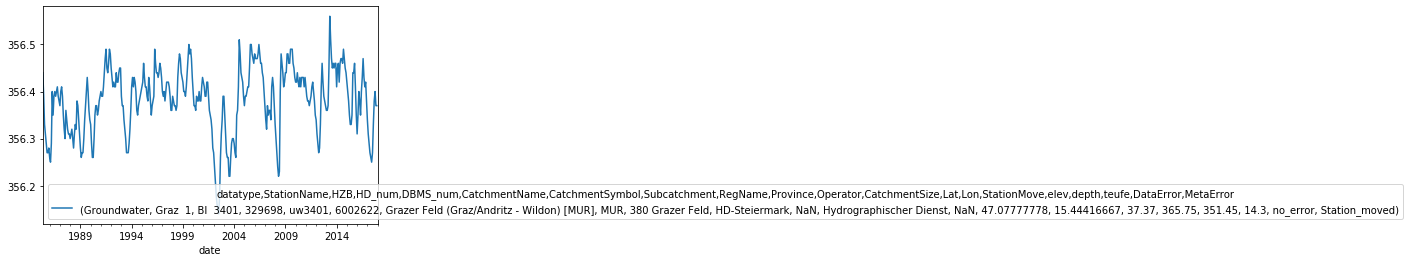

In [10]:
park_well.plot()

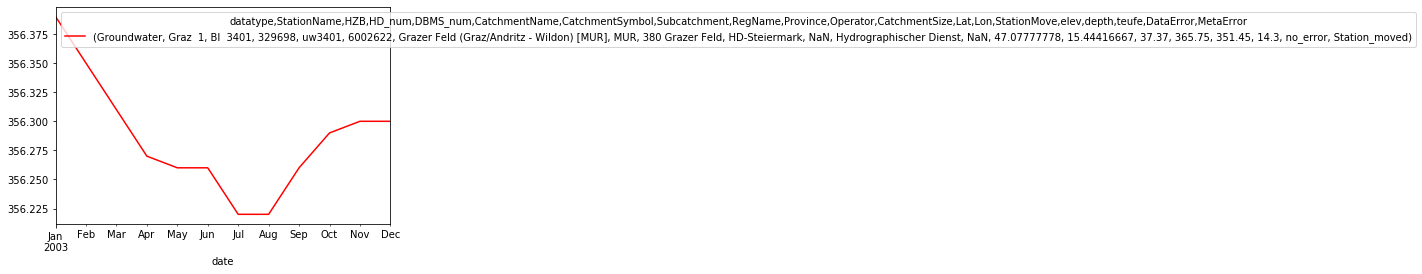

In [13]:
import matplotlib.pyplot as plt
park_well['2003'].plot(color='r')
plt.savefig('Stadtpark_2003.svg')